In [1]:
import os
import mido
import random

In [2]:
def create_all_notes_midi(output_filename:str, duration:int):

    # Create a new MIDI file
    midi = mido.MidiFile()

    # Add a track to the MIDI file
    track = mido.MidiTrack()
    # midi.tracks.append(meta_track)
    midi.tracks.append(track)

    # Set the tempo (optional)
    track.append(mido.MetaMessage('set_tempo', tempo=500000))

    # Add notes to the track
    for i in range(19, 108):
        # Random note
        note = i # Note can go from 0 to 127 but we focus on middle octaves

        # Note on message 
        note_on = mido.Message('note_on', note=note, velocity=64, time=480)  # 1 second (480 ticks at 500000 microseconds per beat)
        track.append(note_on)
        
        # Note off message 
        note_off = mido.Message('note_off', note=note, velocity=0, time=480)  # 1 second (480 ticks)
        track.append(note_off)

    # Save the MIDI file
    midi.save(output_filename)

# meta_track = mido.MidiFile('midi2video/example.mid') .tracks[0]
create_all_notes_midi('test.mid', 128)

In [46]:
def create_random_midi(output_filename:str, duration:int):

    # Create a new MIDI file
    midi = mido.MidiFile()

    # Add a track to the MIDI file
    track = mido.MidiTrack()
    midi.tracks.append(track)

    # # Set the tempo (optional)
    track.append(mido.MetaMessage('set_tempo', tempo=500000))

    # Start note
    start_note = 19

    # Note on message 
    note_on = mido.Message('note_on', note=start_note, velocity=64, time=480)  # 1 second (480 ticks at 500000 microseconds per beat)
    track.append(note_on)
    
    # Note off message 
    note_off = mido.Message('note_off', note=start_note, velocity=0, time=480)  # 1 second (480 ticks)
    track.append(note_off)

    # Add notes to the track
    for _ in range(duration):
        # Random note
        note = int(19+random.random()*88) # Note can go from 20 to 108 (piano has 88 notes)

        # Note on message 
        note_on = mido.Message('note_on', note=note, velocity=64, time=480) 
        track.append(note_on)
        
        # Note off message 
        note_off = mido.Message('note_off', note=note, velocity=0, time=480) 
        track.append(note_off)

    # End note
    end_note = 107

    # Note on message 
    note_on = mido.Message('note_on', note=end_note, velocity=64, time=480)  # 1 second (480 ticks at 500000 microseconds per beat)
    track.append(note_on)
    
    # Note off message 
    note_off = mido.Message('note_off', note=end_note, velocity=0, time=480)  # 1 second (480 ticks)
    track.append(note_off)

    # Save the MIDI file
    midi.save(output_filename)


In [47]:
output_folder = 'dataset'
number_of_tracks = 3600
track_duration = 3

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# meta_track = mido.MidiFile('midi2video/example.mid').tracks[0]

track_counter = 0
for i in range(number_of_tracks):
    output_path = os.path.join(output_folder, f'track_{track_counter}.mid')
    create_random_midi(output_path, track_duration)
    track_counter += 1

In [3]:
mid = mido.MidiFile('midi2video/dataset/track_8.mid')

for tracks in mid.tracks:

    print(tracks)

MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  Message('note_on', channel=0, note=19, velocity=64, time=480),
  Message('note_off', channel=0, note=19, velocity=0, time=480),
  Message('note_on', channel=0, note=25, velocity=64, time=480),
  Message('note_off', channel=0, note=25, velocity=0, time=480),
  Message('note_on', channel=0, note=19, velocity=64, time=480),
  Message('note_off', channel=0, note=19, velocity=0, time=480),
  Message('note_on', channel=0, note=49, velocity=64, time=480),
  Message('note_off', channel=0, note=49, velocity=0, time=480),
  Message('note_on', channel=0, note=107, velocity=64, time=480),
  Message('note_off', channel=0, note=107, velocity=0, time=480),
  MetaMessage('end_of_track', time=0)])


In [8]:
def create_random_midi(output_filename:str, duration:int):

    # Create a new MIDI file
    midi = mido.MidiFile()

    # Add a track to the MIDI file
    track = mido.MidiTrack()
    midi.tracks.append(track)

    # # Set the tempo (optional)
    track.append(mido.MetaMessage('set_tempo', tempo=500000))

    # # Start note
    # start_note = 19

    # # Note on message 
    # note_on = mido.Message('note_on', note=start_note, velocity=64, time=480)  # 1 second (480 ticks at 500000 microseconds per beat)
    # track.append(note_on)
    
    # # Note off message 
    # note_off = mido.Message('note_off', note=start_note, velocity=0, time=480)  # 1 second (480 ticks)
    # track.append(note_off)

    # Add notes to the track
    for i in range(89):
        # Random note
        note = int(19+i) # Note can go from 20 to 108 (piano has 88 notes)

        # Note on message 
        note_on = mido.Message('note_on', note=note, velocity=64, time=480) 
        track.append(note_on)
        
        # Note off message 
        note_off = mido.Message('note_off', note=note, velocity=0, time=480) 
        track.append(note_off)

    # # End note
    # end_note = 107

    # # Note on message 
    # note_on = mido.Message('note_on', note=end_note, velocity=64, time=480)  # 1 second (480 ticks at 500000 microseconds per beat)
    # track.append(note_on)
    
    # # Note off message 
    # note_off = mido.Message('note_off', note=end_note, velocity=0, time=480)  # 1 second (480 ticks)
    # track.append(note_off)

    # Save the MIDI file
    midi.save(output_filename)

create_random_midi('all_notes.mid','fdsafa')


# Create frames with notes

In [1]:
import math
import cv2
import os
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
def get_image_difference(background_path, new_image_path):
    # Read images
    background = cv2.imread(background_path)
    new_image = cv2.imread(new_image_path)

    # Resize images to the same size
    background = cv2.resize(background, (new_image.shape[1], new_image.shape[0]))

    # Convert images to grayscale
    background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    new_image_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    # Get absolute difference between the images
    difference = cv2.absdiff(background_gray, new_image_gray)

    return difference

In [3]:
# Open the video file
video_capture = cv2.VideoCapture('all_notes.mid.mp4')

# Check if the video file opened successfully
if not video_capture.isOpened():
    print("Error: Couldn't open the video file.")
    exit()

# Iterate through frames
frame_count = 0
background = 0
gen = False
notes = {}
note_count = 0
diff_mean_prev = 10
while True:
    # Read the next frame
    ret, frame = video_capture.read()

    # Check if the frame was read successfully
    if not ret:
        break

    diff = cv2.absdiff(background, frame)
    diff_mean = cv2.mean(diff)[0]

    if diff_mean - diff_mean_prev > 0.1:
        notes[note_count] = frame
        note_count += 1
        cv2.imshow('Frame', diff)

    diff_mean_prev = diff_mean

    # Get background frame
    if frame_count == 0:
        background = frame
        frame_count += 1
        gen = True
        continue
        

    # Wait for the 'q' key to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

    frame_count += 1
    

# Release the video capture object and close any open windows
video_capture.release()
cv2.destroyAllWindows()

print("Total frames:", frame_count)


Total frames: 2225


0


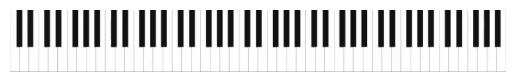

1


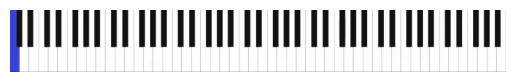

2


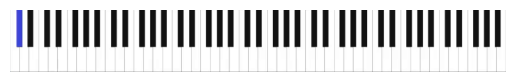

3


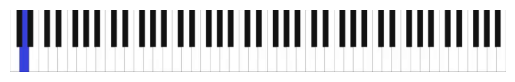

4


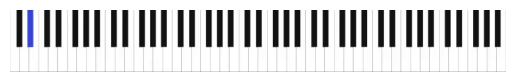

5


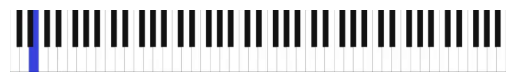

6


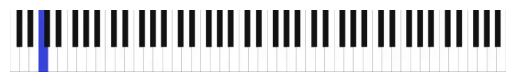

7


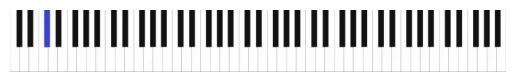

8


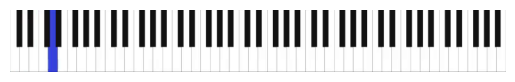

9


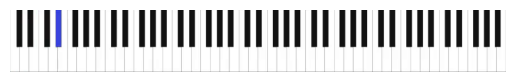

10


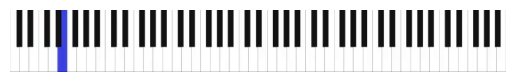

11


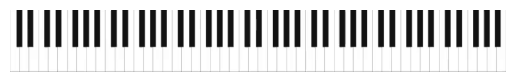

12


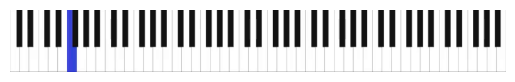

13


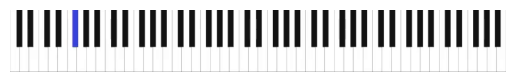

14


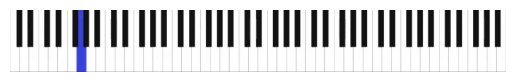

15


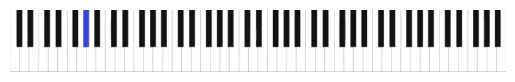

16


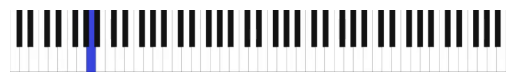

17


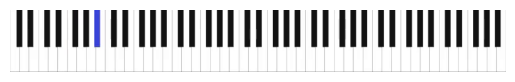

18


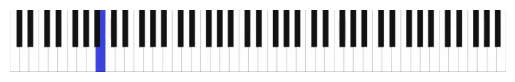

19


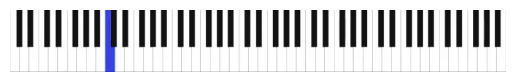

20


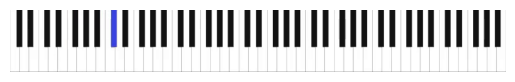

21


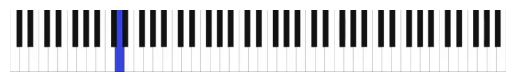

22


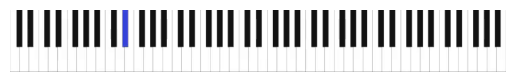

23


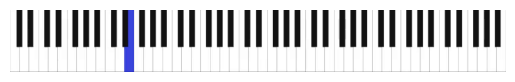

24


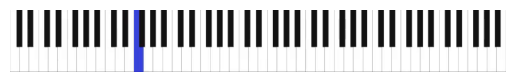

25


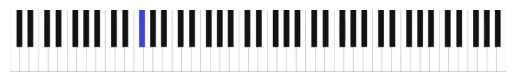

26


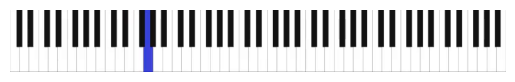

27


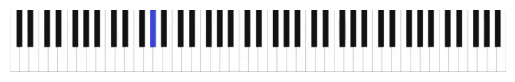

28


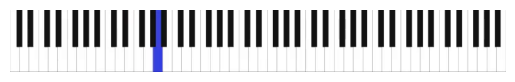

29


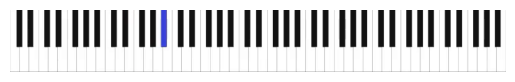

30


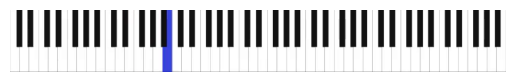

31


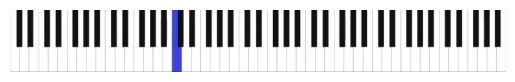

32


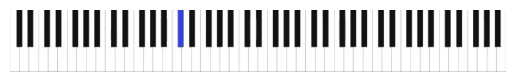

33


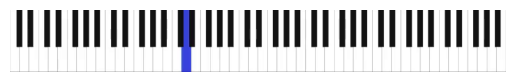

34


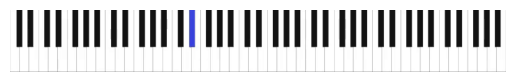

35


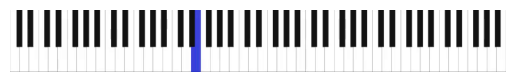

36


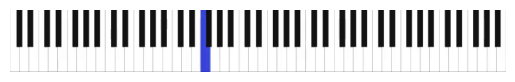

37


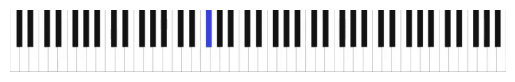

38


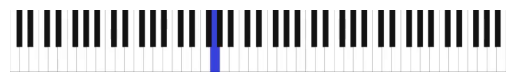

39


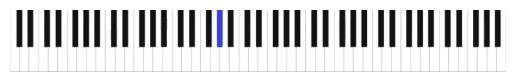

40


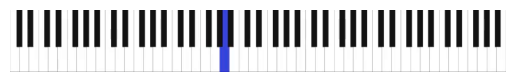

41


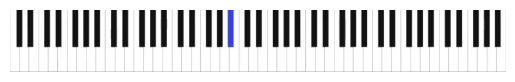

42


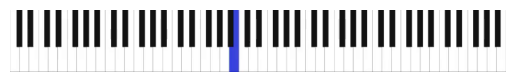

43


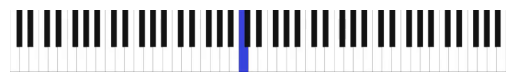

44


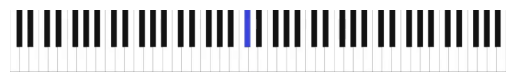

45


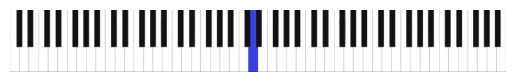

46


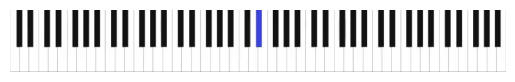

47


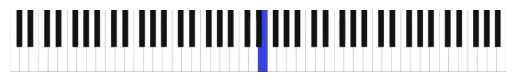

48


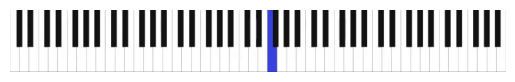

49


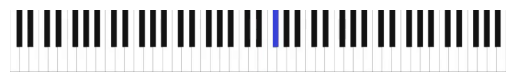

50


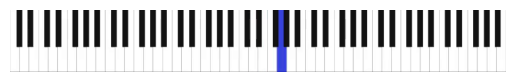

51


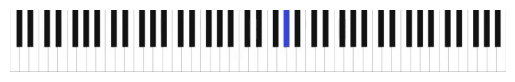

52


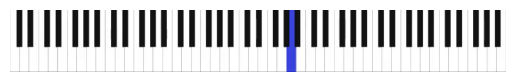

53


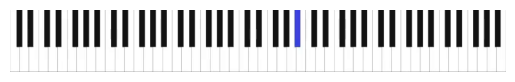

54


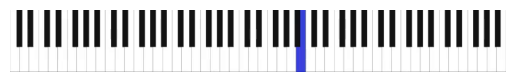

55


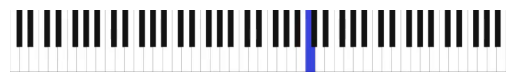

56


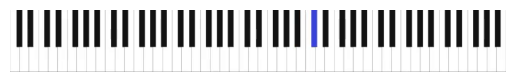

57


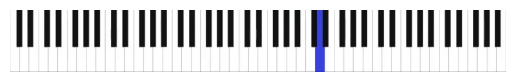

58


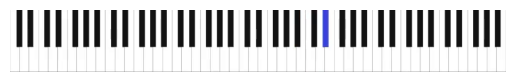

59


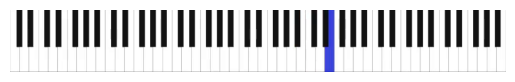

60


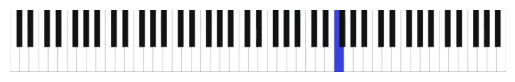

61


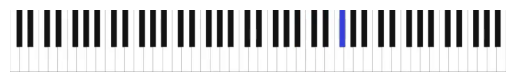

62


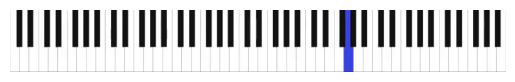

63


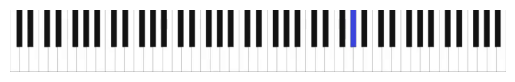

64


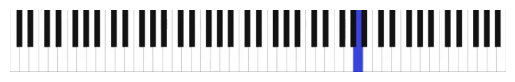

65


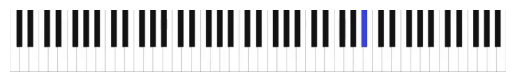

66


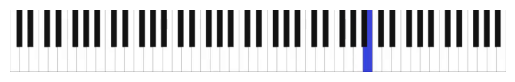

67


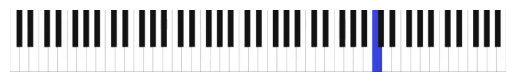

68


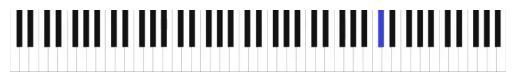

69


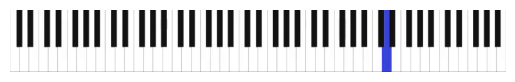

70


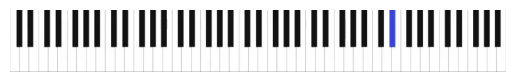

71


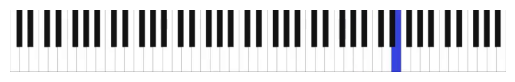

72


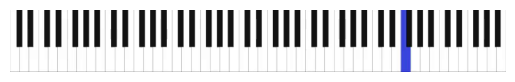

73


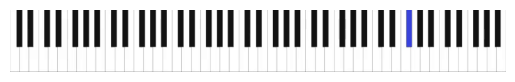

74


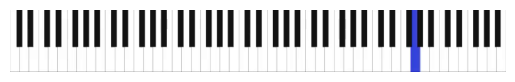

75


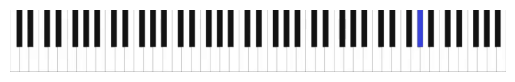

76


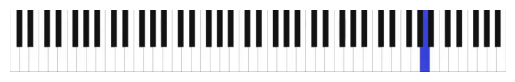

77


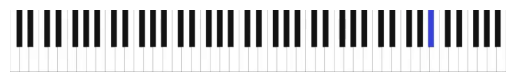

78


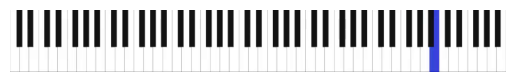

79


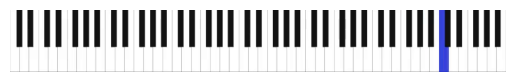

80


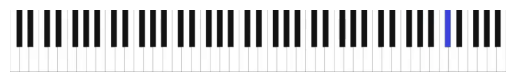

81


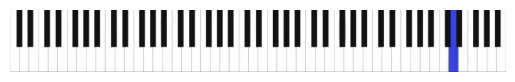

82


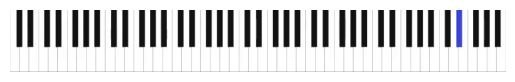

83


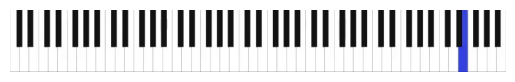

84


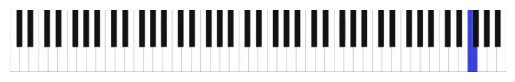

85


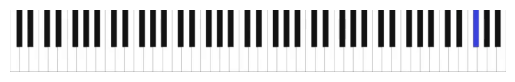

86


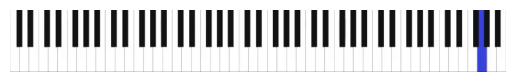

87


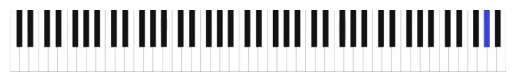

88


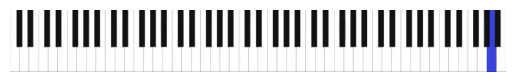

89


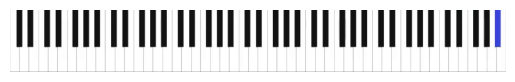

90


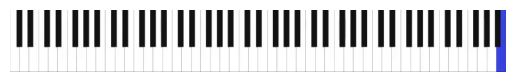

In [7]:
for frame in notes: 
    print(frame)

    # Display the image
    plt.imshow(notes[frame])
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

In [4]:
def create_random_frame(background, frames, note_number):
    new_frame = background.copy()   
    notes = [] 
    used = []
    for i in range(note_number):
        while(True):
            note = int(random.random()*90)
            if note not in used: 
                break
            
        print(note)
        new_frame += frames[note] 
        notes.append(str(note))

    return new_frame, notes

In [5]:
for i in range(1, 7):
    for j in range(1000):
        new_image, note_list = create_random_frame(background, notes, i)
        filename = '_'.join(note_list) + '.png'
        cv2.imwrite(os.path.join('note_frames', f'{filename}'), new_image) 

67
22
46
62
36
53
46
9
20
15
49
50
2
40
84
37
50
43
10
55
29
68
79
19
23
77
89
32
65
14
7
37
75
47
15
72
48
7
38
7
47
40
34
81
38
39
66
4
52
21
42
45
89
65
14
85
37
38
32
28
84
30
48
61
42
31
85
8
61
56
52
47
79
6
4
8
22
15
41
16
43
56
2
48
69
25
18
65
72
36
31
25
83
59
39
22
86
31
46
36
12
55
28
37
59
50
49
50
14
79
78
81
62
19
51
71
9
53
26
57
66
78
14
84
23
2
42
30
8
55
6
72
37
81
88
77
87
3
72
10
24
54
66
43
23
69
89
0
28
44
14
41
57
35
55
83
14
4
48
42
8
72
42
8
73
70
89
67
13
62
64
44
44
81
58
85
17
42
76
31
79
18
24
67
66
35
33
49
26
55
63
82
68
52
48
9
44
73
49
65
73
38
87
13
37
15
88
69
14
73
50
33
12
46
67
11
14
3
55
69
76
20
30
89
86
56
46
80
17
51
49
8
74
47
53
32
68
51
11
6
88
66
85
21
24
31
80
86
49
40
32
67
70
70
27
69
77
23
24
41
44
52
34
0
87
39
88
62
51
43
82
44
20
29
19
3
49
59
69
49
51
27
50
28
32
85
43
78
68
57
10
88
77
7
69
49
75
18
67
28
4
66
19
65
72
80
5
37
70
39
46
0
39
40
89
45
41
11
44
53
84
28
74
71
68
19
79
66
72
10
5
0
3
15
40
81
35
84
50
68
33
6
53
8
26


# Create video from frames and midi

In [9]:
import mido

In [62]:
mid = mido.MidiFile('all_notes.mid')

time = 0
for i in mid.tracks[0]:
    time += i.time

time/60, mid.tracks[0]

(1424.0,
 MidiTrack([
   MetaMessage('set_tempo', tempo=500000, time=0),
   Message('note_on', channel=0, note=19, velocity=64, time=480),
   Message('note_off', channel=0, note=19, velocity=0, time=480),
   Message('note_on', channel=0, note=20, velocity=64, time=480),
   Message('note_off', channel=0, note=20, velocity=0, time=480),
   Message('note_on', channel=0, note=21, velocity=64, time=480),
   Message('note_off', channel=0, note=21, velocity=0, time=480),
   Message('note_on', channel=0, note=22, velocity=64, time=480),
   Message('note_off', channel=0, note=22, velocity=0, time=480),
   Message('note_on', channel=0, note=23, velocity=64, time=480),
   Message('note_off', channel=0, note=23, velocity=0, time=480),
   Message('note_on', channel=0, note=24, velocity=64, time=480),
   Message('note_off', channel=0, note=24, velocity=0, time=480),
   Message('note_on', channel=0, note=25, velocity=64, time=480),
   Message('note_off', channel=0, note=25, velocity=0, time=480),
   

In [93]:
mid = mido.MidiFile('itsy_bitsy_spider_(unknown).mid')

time = 0
for i in mid.tracks[1]:
    time += i.time

time/60, mid.tracks[1]

(417.3333333333333,
 MidiTrack([
   MetaMessage('midi_port', port=1, time=0),
   MetaMessage('track_name', name='Piano               ', time=0),
   Message('program_change', channel=0, program=2, time=0),
   Message('control_change', channel=0, control=7, value=127, time=0),
   Message('note_on', channel=0, note=65, velocity=71, time=768),
   Message('note_on', channel=0, note=53, velocity=54, time=0),
   Message('control_change', channel=0, control=64, value=127, time=29),
   Message('note_off', channel=0, note=65, velocity=64, time=51),
   Message('note_off', channel=0, note=53, velocity=64, time=0),
   Message('note_on', channel=0, note=65, velocity=70, time=16),
   Message('note_off', channel=0, note=65, velocity=64, time=80),
   Message('control_change', channel=0, control=64, value=0, time=1),
   Message('note_on', channel=0, note=65, velocity=79, time=15),
   Message('note_on', channel=0, note=60, velocity=43, time=0),
   Message('note_on', channel=0, note=57, velocity=48, time=

In [102]:
time = 0
for i in mid.tracks[4]:
    if i.type == 'set_tempo':
        time += i.time
        print(i.type)

# time/60, mid.tracks[0]

In [80]:
print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_value_names', '_setattr', 'bin', 'bytes', 'copy', 'dict', 'from_bytes', 'from_dict', 'hex', 'is_cc', 'is_meta', 'is_realtime', 'name', 'time', 'type']
